In [1]:
from PIL import Image
from resizeimage import resizeimage
from tqdm import tqdm
%matplotlib inline

In [2]:
data_dir=os.path.join(os.getcwd(),'Cat_zigzag')
image_list=os.listdir(data_dir)
image_styled_list=[]
for im in image_list:
    if('stylized' in im):
        image_styled_list.append(im)
print('The number of images: '+str(len(image_styled_list)))

The number of images: 200


# Resizing the images to(224 x 224 or 299 x 299)

In [3]:
for im in image_styled_list:
    im_in=os.path.join(data_dir,im)
    im_out_224=os.path.join(os.getcwd(),'cat_zigzag_224',im)
    im_out_299=os.path.join(os.getcwd(),'cat_zigzag_299',im)
    

    with open(im_in, 'r+b') as f:
        with Image.open(f) as image:
            cover = resizeimage.resize_cover(image, [224, 224])
            cover.save(im_out_224, image.format)
            cover.save(im_out_299, image.format)

# Connect to the Watson cloud API
```
from watson_developer_cloud import VisualRecognitionV3

visual_recognition = VisualRecognitionV3(
    version='2016-05-20',
    api_key='INSERT API KEY HERE'
)
```
# Now classify the images and store the result:
```
# data_dir_1=os.path.join(os.getcwd(),'cat_zigzag_224')
# image_style_list_1=os.listdir(data_dir_1)
data_dir_2=os.path.join(os.getcwd(),'cat_zigzag_299')
image_style_list_2=os.listdir(data_dir_2)
df_results_ibm=pd.DataFrame(columns=['image','class','score'])
for row_ind,im in tqdm(enumerate(image_style_list_2)):
    im_in=os.path.join(data_dir_2,im)
    with open(im_in, 'rb') as image_file:
        classes = visual_recognition.classify( image_file)    
    df_results_ibm.loc[row_ind,'image']=im
    df_results_ibm.loc[row_ind,'class']=classes["images"][0]["classifiers"][0]["classes"][0]['class']

df_results_ibm.to_csv('df_results_ibm_299.csv', index=False)

```

# The results:

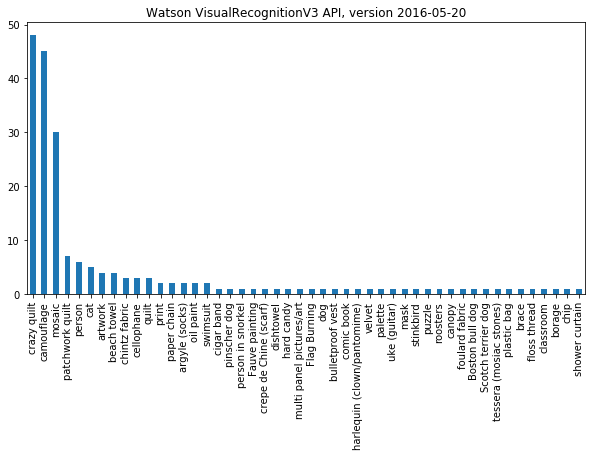

In [4]:
df_results_ibm=pd.read_csv('df_results_ibm_299.csv')
df_results_ibm.loc[:,'class'].value_counts().plot(kind='bar',figsize=(10,5))
plt.title('Watson VisualRecognitionV3 API, version 2016-05-20')
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})
plt.savefig('class_dist_ibm.eps')

C:\toolkits.win\anaconda3-4.4.0\lib\site-packages\matplotlib\figure.py:1999: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


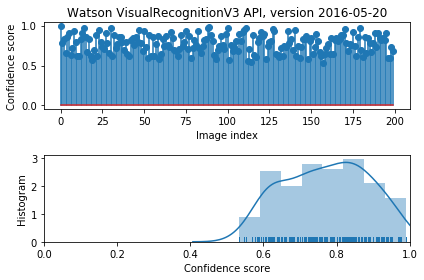

In [5]:
plt.subplot(2,1,1)
plt.stem(df_results_ibm.score.values)
plt.ylabel('Confidence score')
plt.xlabel('Image index')
plt.title('Watson VisualRecognitionV3 API, version 2016-05-20')


plt.subplot(2,1,2)
import seaborn as sns
sns.distplot(df_results_ibm.score.values,hist=True, rug=True)
plt.xlim([0,1])
plt.ylabel('Histogram')
plt.xlabel('Confidence score')

from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})
plt.savefig('score_ind_ibm.eps')

# Now, let's visualize some of the examples that were correctly classified and incorrectly classified:

C:\toolkits.win\anaconda3-4.4.0\lib\site-packages\matplotlib\figure.py:1999: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


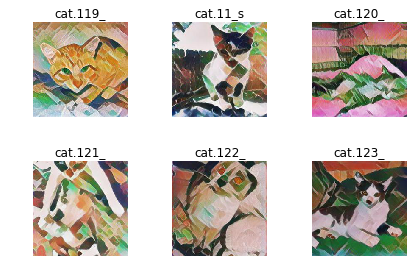

In [6]:
data_dir_2=os.path.join(os.getcwd(),'cat_zigzag_299')
cat_list=df_results_ibm.loc[(df_results_ibm.loc[:,'class'].values=='cat'),'image'].values
non_cat_list=df_results_ibm.loc[(df_results_ibm.loc[:,'class'].values!='cat'),'image'].values[20:30]
import matplotlib.image as mpimg
plt.figure(figsize=(20,20))

    
fig, axes = plt.subplots(2, 3)

for i, ax in enumerate(axes.ravel()):
    if(i<6):
        img=mpimg.imread(os.path.join(data_dir_2,non_cat_list[i]))
        im = ax.imshow(img)
        ax.set_title(non_cat_list[i][0:8])
        ax.axis('off')

plt.tight_layout()
plt.savefig('incorrectly_predicted_2.eps')

C:\toolkits.win\anaconda3-4.4.0\lib\site-packages\matplotlib\figure.py:1999: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


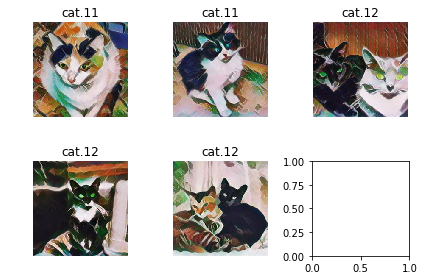

In [7]:
plt.figure(figsize=(20,20))
fig, axes = plt.subplots(2, 3)

for i, ax in enumerate(axes.ravel()):
    if(i<5):
        img=mpimg.imread(os.path.join(data_dir_2,cat_list[i]))
        im = ax.imshow(img)
        ax.set_title(non_cat_list[i][0:6])
        ax.axis('off')

plt.tight_layout()
plt.savefig('correctly_predicted_2.eps')